# Introduction to `pyiron_workflow`

`pyiron_workflow` is a framework for constructing workflows as computational graphs from simple python functions. Its objective is to make it as easy as possible to create reliable, reusable, and sharable workflows, with a special focus on research workflows for HPC environments.

Nodes are formed from python functions with simple decorators, and the resulting nodes can have their data inputs and outputs connected. Unlike regular python, they operate in a delayed way.

By allowing (but not demanding, in the case of data DAGs) users to specify the execution flow, both cyclic and acyclic graphs are supported.

By scraping type hints from decorated functions, both new data values and new graph connections are (optionally) required to conform to hints, making workflows strongly typed.

In [1]:
from pyiron_workflow import Workflow

In [2]:
from datetime import datetime

In [3]:
def get_speed(distance: int | float, time: int | float) -> int | float:
    speed = distance / time
    return speed

In [4]:
def get_time(starting_time, finishing_time):
    return (finishing_time - starting_time).seconds

In [5]:
distance = 10.

starting_time = datetime(2025, 6, 5, 12)
finishing_time = datetime(2025, 6, 5, 13)

In [6]:
time = get_time(starting_time=starting_time, finishing_time=finishing_time)
speed = get_speed(distance=distance, time=time)

In [7]:
print("Speed:", speed)

Speed: 0.002777777777777778


In [10]:
wf = Workflow("Speed")

### Damped Harmonic Oscillator Equation

$$
\frac{d^2x}{dt^2} + 2\gamma \frac{dx}{dt} + \omega^2 x = 0
$$

We convert this second-order ODE into a system of two first-order ODEs:

Let:

* $x_1 = x$
* $x_2 = \frac{dx}{dt}$

Then:

$$
\begin{cases}
\frac{dx_1}{dt} = x_2 \\
\frac{dx_2}{dt} = -2\gamma x_2 - \omega^2 x_1
\end{cases}
$$


In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
gamma = 0.1   # Damping coefficient
omega = 2.0   # Natural frequency
total_time = 20.0

# Define the system of ODEs
def damped_oscillator(t, y, gamma, omega):
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - omega**2 * x
    return [dxdt, dvdt]

def set_initial_conditions(x_0=1.0, v_0=0):
    return [x_0, v_0]

def get_time_span(t):
    return (0, t)

def get_time_discretization(time_span, discretization=500):
    return np.linspace(*time_span, discretization)

def solve(gamma, omega, initial_conditions, time_span, t_list):
    return solve_ivp(lambda t, y: damped_oscillator(t, y, gamma, omega), time_span, initial_conditions, t_eval=t_list)

# Plot results
def plot_results(sol):
    plt.plot(sol.t, sol.y[0], label='x(t)')
    plt.plot(sol.t, sol.y[1], label="v(t) = dx/dt", linestyle='--')
    plt.xlabel('Time t')
    plt.ylabel('Displacement / Velocity')
    plt.title('Damped Harmonic Oscillator')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    return plt

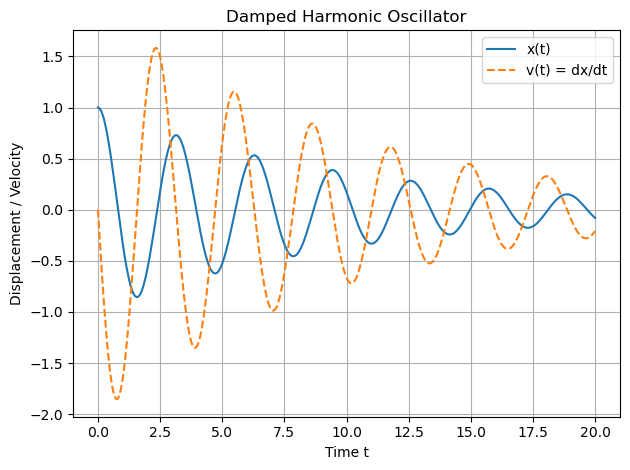

In [9]:
cond = set_initial_conditions()
time_span = get_time_span(total_time)
t_list = get_time_discretization(time_span=time_span)
sol = solve(gamma=gamma, omega=omega, time_span=time_span, initial_conditions=cond, t_list=t_list)
plt = plot_results(sol)